In [43]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import time
import os

In [2]:
files = !dir data\210609*

In [25]:
files = os.listdir('data')

In [26]:
for f in files: 
    if "210609" in f: print(f)

210609_123616_time_sweep.h5
210609_123803_time_sweep.h5
210609_124009_time_sweep.h5
210609_124256_time_sweep.h5
210609_124512_time_sweep.h5
210609_124829_time_sweep.h5
210609_130635_thor_cam_capture.h5
210609_130649_thor_cam_capture.h5
210609_131355_time_sweep.h5
210609_132020_time_sweep.h5
210609_132429_time_sweep.h5
210609_132754_time_sweep.h5
210609_133148_time_sweep.h5
210609_133709_time_sweep.h5
210609_134026_time_sweep.h5
210609_134257_time_sweep.h5
210609_144306_frequency_sweep.h5
210609_144518_frequency_sweep.h5
210609_144927_frequency_sweep.h5
210609_145130_frequency_sweep.h5
210609_145346_frequency_sweep.h5
210609_145358_frequency_sweep.h5
210609_145950_frequency_sweep.h5
210609_150205_frequency_sweep.h5
210609_150350_frequency_sweep.h5
210609_150636_frequency_sweep.h5
210609_150854_frequency_sweep.h5
210609_151057_frequency_sweep.h5
210609_151256_frequency_sweep.h5
210609_151528_frequency_sweep.h5
210609_151958_frequency_sweep.h5
210609_152343_frequency_sweep.h5
210609_15264

In [31]:
folderpath = "data/" 
time_sweeps = dict()
f_list = []
for f in files:
#     if "210609" in f and '122117' not in f:
#     if '200311_201726' not in f:
    if '210625_151043_time_sweep.h5' in f:
        if "time_sweep" in f:
            print(f)
    #         if "191108" in f: ##########temp
            loaded_f = h5py.File(folderpath+f,'r')
            f_list.append(loaded_f)
            t_array = np.array(dict(loaded_f['measurement/time_sweep'])['t_array'])
            t_array_trim = np.trim_zeros(t_array)
            all_times = len(t_array_trim) >= len(t_array) - 5 #tolerate a few missing values
    #         all_times = np.all([t!=0 for t in t_array])
            if all_times:
                time_sweeps[f] = {'raw':loaded_f}

# f = h5py.File("h5/190618_171253_time_sweep.h5", 'r')
# print(dict(f['app/settings'].attrs))
# print(list(dict(f['measurement/time_sweep'])['t_array']))
print(time_sweeps.keys())

for sweep in time_sweeps.keys():
    time_sweeps[sweep]['sample'] = time_sweeps[sweep]['raw']['app/settings'].attrs['sample']

210625_151043_time_sweep.h5
dict_keys(['210625_151043_time_sweep.h5'])


In [32]:
# # f_list = [
# #     h5py.File("data/210126_210930_time_sweep.h5",'r'),
# #     h5py.File("data/210126_211014_time_sweep.h5",'r'),
# #     h5py.File("data/210126_211225_time_sweep.h5",'r'),
# #     h5py.File("data/210126_211405_time_sweep.h5",'r'),
# #     h5py.File("data/210126_211545_time_sweep.h5",'r'),
# #     h5py.File("data/210126_211729_time_sweep.h5",'r'),
# #     h5py.File("data/210126_212506_time_sweep.h5",'r'),
# #     h5py.File("data/210126_212659_time_sweep.h5",'r'),
# #     h5py.File("data/210126_212914_time_sweep.h5",'r'),
# #     h5py.File("data/210126_213110_time_sweep.h5",'r'),
# #     h5py.File("data/210126_213302_time_sweep.h5",'r'),
# #     h5py.File("data/210126_213732_time_sweep.h5",'r'),
# #     h5py.File("data/210126_213909_time_sweep.h5",'r'),
# #     h5py.File("data/210126_214054_time_sweep.h5",'r'),
# #     h5py.File("data/210126_214236_time_sweep.h5",'r'),
# #     h5py.File("data/210126_214418_time_sweep.h5",'r'),
# #     h5py.File("data/210126_214556_time_sweep.h5",'r'),
# #     h5py.File("data/210126_214734_time_sweep.h5",'r')]

# f_list = [
#     h5py.File("data/210127_151727_time_sweep.h5",'r'),
#     h5py.File("data/210127_151906_time_sweep.h5",'r'),
#     h5py.File("data/210127_152047_time_sweep.h5",'r'),
#     h5py.File("data/210127_152239_time_sweep.h5",'r'),
#     h5py.File("data/210127_152418_time_sweep.h5",'r'),
#     h5py.File("data/210127_152557_time_sweep.h5",'r'),
#     h5py.File("data/210127_153056_time_sweep.h5",'r')]

M_list = [f['measurement/time_sweep'] for f in f_list]

In [33]:
# list(f.keys())

In [34]:
dict(f_list[0]['app/settings'].attrs)

{'save_dir': 'C:\\Users\\lab\\Documents\\foundry_scope\\TDTR\\data',
 'sample': 'si_control_pumpandref',
 'data_fname_format': '{timestamp:%y%m%d_%H%M%S}_{measurement.name}.{ext}'}

In [35]:
# f_list = [f4,f5, f6, f7]
# M_list = [f['measurement/time_sweep'] for f in f_list]
# M1 = f1['measurement/Time_sweep']
# M2 = f2['measurement/Time_sweep']
# M3 = f3['measurement/Time_sweep']
# M4 = f4['measurement/Time_sweep']
# M5 = f5['measurement/Time_sweep']
# M_list = [M1, M2, M3, M4]

In [36]:
np.array(M_list[0]['delay_times'])

array([-2.00e+01, -1.90e+01, -1.80e+01, -1.70e+01, -1.60e+01, -1.50e+01,
       -1.40e+01, -1.30e+01, -1.20e+01, -1.10e+01, -1.00e+01, -9.00e+00,
       -8.00e+00, -7.00e+00, -6.00e+00, -5.00e+00, -4.00e+00, -3.00e+00,
       -2.00e+00, -1.00e+00,  0.00e+00,  1.00e+00,  2.00e+00,  3.00e+00,
        4.00e+00,  5.00e+00,  6.00e+00,  7.00e+00,  8.00e+00,  9.00e+00,
        1.00e+01,  1.10e+01,  1.20e+01,  1.30e+01,  1.40e+01,  1.50e+01,
        1.60e+01,  1.70e+01,  1.80e+01,  1.90e+01,  2.00e+01,  6.00e+01,
        1.00e+02,  1.40e+02,  1.80e+02,  2.20e+02,  2.60e+02,  3.00e+02,
        3.40e+02,  3.80e+02,  4.20e+02,  4.60e+02,  5.00e+02,  5.40e+02,
        5.80e+02,  6.20e+02,  6.60e+02,  7.00e+02,  7.40e+02,  7.80e+02,
        8.20e+02,  8.60e+02,  9.00e+02,  9.40e+02,  9.80e+02,  1.02e+03,
        1.06e+03,  1.10e+03,  1.14e+03,  1.18e+03,  1.22e+03,  1.26e+03,
        1.30e+03,  1.34e+03,  1.38e+03,  1.42e+03,  1.46e+03,  1.50e+03,
        1.54e+03,  1.58e+03,  1.62e+03,  1.66e+03, 

In [37]:
dict(M['settings'].attrs)

NameError: name 'M' is not defined

In [38]:
# dict(f_list[0]['hardware/TDTR_Lockin/settings'].attrs)
for f in f_list:
    if 'short' in dict(f['measurement/time_sweep/settings'].attrs)['notes']:
        print(f)
        print(dict(f['measurement/time_sweep/settings'].attrs)['notes'])

<HDF5 file "210625_151043_time_sweep.h5" (mode r)>
put 600 *short* pass filter in to block probe signal from detector


In [39]:
dict(M['delay_times'].attrs)

NameError: name 'M' is not defined

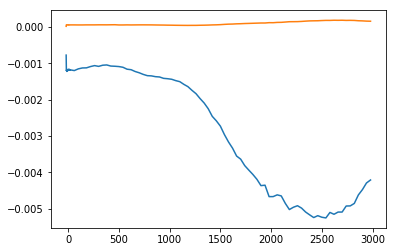

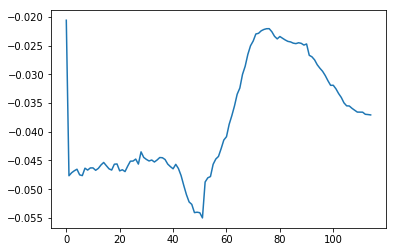

In [48]:
# import matplotlib.pyplot as plt
# %pylab inline
for M in M_list:
    plt.figure()
    plt.plot(M['t_array'], M['x_array'])
    plt.plot(M['t_array'], M['y_array'])
    plt.figure()
    plt.plot(np.array(M['y_array'])/M['x_array'])

In [41]:
def correct_phase(X, Y, t_vect):
    """Takes in the raw X (in-phase), Y (out-of-phase), and t_vect (delay time) data (must all be same
    length array) and calculates any residual phase error by enforcing that Y remain constant over the
    zero crossing of the delay time at `t_vect`=0.  Returns the corrected X and Y, with phase adjusted."""
    selection_before_a = t_vect >= -15e-12 # Create mask for delay times between -10 & -5 ps #sw now -15 -5
    selection_before_b = t_vect <= -5e-12
    selection_before = np.array([all(tup) for tup in zip(selection_before_a, selection_before_b)])
    selection_after_a = t_vect >= 5e-12 # Create mask for delay times between +5 & +10 ps
    selection_after_b = t_vect <= 15e-12
    selection_after = np.array([all(tup) for tup in zip(selection_after_a, selection_after_b)])

    assert any(selection_after) # ensure that there are points to use for phase correction
    assert any(selection_before)


    dX = np.mean(X[selection_after]) - np.mean(X[selection_before]) # Change in X over zero-crossing of t
    dY = np.mean(Y[selection_after]) - np.mean(Y[selection_before]) # Change in Y over zero-crossing of t
    phase_correction = np.arctan2(dY,dX) # the amount the phase was off by
    X_corrected = X*np.cos(phase_correction) + Y*np.sin(phase_correction) # rotate in complex plane
    Y_corrected = Y*np.cos(phase_correction) - X*np.sin(phase_correction)

    print ("Corrected phase of data by {0:.2f} degrees".format(phase_correction*(180/np.pi)))
    return X_corrected, Y_corrected

In [62]:
M_corr = []
for M in M_list:
    try:
        x_corr, y_corr = correct_phase(np.array(M['x_array']), np.array(M['y_array']),np.array(M['t_array'])*1e-12)
        M_corr.append({'t':np.array(M['t_array'])*1e-12, 'x':x_corr, 'y':y_corr})
    except:
        print('failed to correct phase')

Corrected phase of data by -1.08 degrees
Corrected phase of data by -1.62 degrees
Corrected phase of data by 1.67 degrees
Corrected phase of data by -0.58 degrees
Corrected phase of data by 0.05 degrees
Corrected phase of data by -0.67 degrees


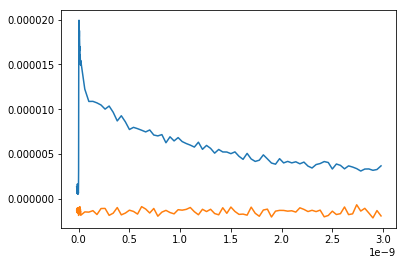

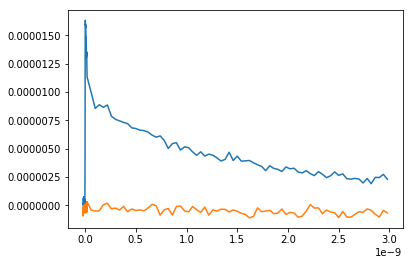

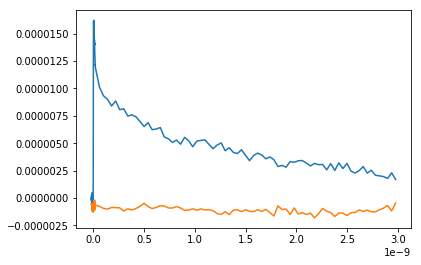

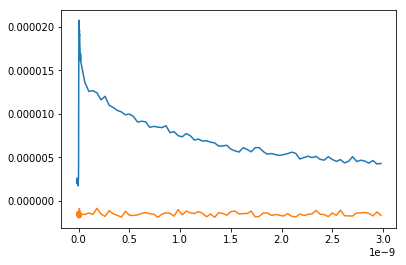

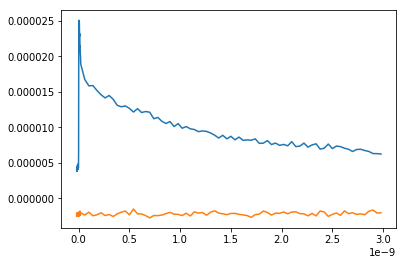

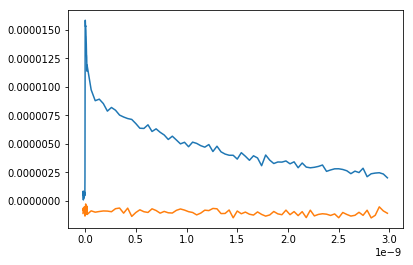

<Figure size 432x288 with 0 Axes>

In [63]:
for M in M_corr:
    plt.plot(M['t'], M['x'])
    plt.plot(M['t'], M['y'])
#     plt.ylim([-3e-5,0])
    plt.figure()
# for M in M_corr[-2:]:
#     plt.plot(M['t'], -M['x']/M['y'])

In [64]:
from scipy.integrate import simps # for numerical integration (inverse Hankel transform)
from scipy.optimize import curve_fit # for fitting data (TDTR data and laser spot sizes)


class TDTR():
    """Main object to hold data, variables, and methods associated with simulating, fitting,
    and plotting 2-D cylindrically anisotropic TDTR sensitivities, simulations, and experiments.
    
    Ref [1]: Cahill, D. G. (2004). Analysis of heat flow in layered structures for time-domain thermoreflectance. 
        Review of Scientific Instruments, 75(12), 5119–5122. doi:10.1063/1.1819431
    """
    def __init__(self, layers=None, errs_rel=None, spot_err_rel=0.1, phase_err=0.2, T_err_rel=0.02, Al_sheet_res_err_rel=0):
        """Initialize object.  Set default values for physical system.  Later on, can override some values
        for fitting purposes manually or automatically by reading in data files.
        
        layers : list of dictionaries, optional
            Specify thermophysical material properties for each layer in the system.  Default properties
            shown below
        errs_rel : list of dictionaries, optional
            Specify relative uncertainties in the thermophysical material properties for each layer in the system.  
            Same format as for layers (see below for default values).  An entry of 0.1 corresponds to a 10% 
            uncertainty.  Properties with an uncertainty of 0 will be skipped in the error propagation calculations.  
            Enter 0 for any fitted variables (uncertainty should be independent of initial guess), and calculated fit
            uncertainties will be used for these.
        spot_err_rel : float, optional
            Relative uncertainty in the spot size measurements
        phase_err : float, optional
            Uncertainty in degrees (not radians, nor relative) of phase of measured signal
        T_err_rel : float, optional
            Relative uncertainty in absolute (i.e. Kelvins) sample temperature
        """
# \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
# --------------- Edit below section to specify system properties and uncertainties ---------------
# /////////////////////////////////////////////////////////////////////////////////////////////////
        
        # Thermophysical system material properties used for simulation and fitting
        #   Later, use TDTR.load_exp_data() to load in and automatically parse / update parameters from data files
        if layers == None: # default system: Al on Si
            self.layer = [# layer name  |  kz [W/m-K] | anisotropy [kr/kz] | Cv [J/m^3-K]   |  thickness [m]
                {'name':'Al Transducer',   'kz':110.,     'eta':1.,         'Cv':2.396e6,       'L':70e-9},
                {'name':'Al-Si TBC',       'kz':0.1,      'eta':1.,         'Cv':1.,            'L':1e-9},
                {'name':'Intrinsic Si',    'kz':142,      'eta':1.,         'Cv':1.549e6,       'L':1e-3}]
        else:
            self.layer = layers # alternatively, can specify properties during object creation later
            
        # Relative uncertainties for error propagation, input  spot_err_rel and phase_err above
        if errs_rel == None: # default relative uncertainties for system parameters (assumes fitting k_sub & TBC)
            self.errs_rel = [# layer name  |  kz_err    | anisotropy_err   |   Cv_err     |  thickness_err
                {'name':'Al Transducer',     'kz':.1,       'eta':0.,         'Cv':0.05,       'L':0.1},
                {'name':'Al-Si TBC',         'kz':0.,       'eta':0.,         'Cv':0.,         'L':0.},
                {'name':'Intrinsic Si',      'kz':0.,       'eta':0.,         'Cv':0.05,       'L':0.}]
        else:
            self.errs_rel = errs_rel # alternatively, can specify uncertainties during object creation later
        self.spot_err_rel = spot_err_rel # set default in arguments list above
        self.phase_err = phase_err # set default in arguments list above
        self.T_err_rel = T_err_rel # set default in arguments list above
        self.Al_sheet_res_err_rel = Al_sheet_res_err_rel
        
        # General system parameters
        self.f0 = 2461500. # [Hz] default pump laser modulation frequency, overwritten if run load_exp_data()
        self.tdelay_min = 100e-12 # [sec] default shortest delay time for simulations and fitting
        self.tdelay_max = 3300e-12 # [sec] default longest delay time for simulations and fitting
        self.T_sample = 294. # [K] temperature of sample, overwritten if run load_exp_data()
        self.spot_fit_window = 20 # [px] window half-width for cropping and fitting laser spots
        self.W0 = 5e-6 # [m] pump laser spot 1/e^2 radius, overwritten if run load_exp_data()
        self.W1 = 5e-6 # [m] probe laser spot 1/e^2 radius, overwritten if run load_exp_data()
        self.spot_correction = 1. # Correction factor to adjust measured spot sizes
        self.A0 = 10e-3 # [W] time-averaged incident laser power, used to estimate heating, not used for fitting
        
# /////////////////////////////////////////////////////////////////////////////////////////////////
# --------------------------------- End properties edit section ----------------------------------
# \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
        
        self.tau_rep = 1./80.1e6 # [sec] Laser repetition period (i.e. pulse width)
        self.absorptance = 0.1 # Al has approx. 0.1 absorptance for most wavelengths in vis & near-IR
        self.TCR = 1e-4 # [1/K] temperature coefficient of optical reflectivity for Al
        self.L_Al_ox = 4e-9 # [m] assumed thickness of oxide layer at top of aluminum
        self.abs_layer = 10e-9 # [m] assumed thickness of top of transducer layer over which laser energy is absorbed
        self.Al_sheet_res = None # By default, do not compute k_Al from its electrical sheet resistance
        self.Cvs_to_set = None # By default, do not interpolate any Cvs at specific temperatures
        self.objective = None # will be assigned if fitting to experimental data
        # Sarah's filler for lack of Cv data
        self.C_Al = 2.396e6 #from above
        self.C_Al2O3 = 3.423e6 #estimated
        self.C_Si = 1.549e6 #from above

        
        # Compute some arrays used later for simulation and fitting
        #print ("~~Vectorized Python TDTR code written by Sean Lubner~~\n")
        self.update_freq_vectors() # make sure all frequency vector components are consistent w/ mat'l properties
        self.update_material_props() # make sure all properties are self-consistent
    
    def set_f0(self, f0):
        """Enforce consistency in changing modulation frequency, and the subsequent updating of related quantities"""
        self.f0 = f0 # [Hz] set modulation frequency
        self.update_freq_vectors()
    def set_tdelay_min(self, tdelay_min):
        """Enforce consistency in changing min delay time, and the subsequent updating of related quantities"""
        self.tdelay_min = tdelay_min
        self.update_freq_vectors()
    def set_tdelay_max(self, tdelay_max):
        """Enforce consistency in changing min delay time, and the subsequent updating of related quantities"""
        self.tdelay_max = tdelay_max
        self.update_freq_vectors()
    def set_tau_rep(self, tau_rep):
        """Enforce consistency in changing laser inter-pulse time"""
        self.tau_rep = tau_rep
        self.update_freq_vectors()
    def update_freq_vectors(self):
        """Recalculate all frequency vector components to be self-consistent with system properties"""
        self.tdelay_vect = np.linspace(self.tdelay_min, self.tdelay_max, num=100) # [sec] vector of probe delay times
        try:
            selection_low = self.raw_data[:,0]*1e-12 >= self.tdelay_min # re-select out data to fit to...
            selection_high = self.raw_data[:,0]*1e-12 <= self.tdelay_max
            selection = np.array([all(tup) for tup in zip(selection_low, selection_high)])
            self.tdelay_vect = self.raw_data[selection, 0]*1e-12 
            self.dT_ratio_exp = -self.X_corrected[selection]/self.Y_corrected[selection]
        except:
            pass # haven't loaded in any experimental data yet
        self.M = 10*(1+int(self.tau_rep/min(min(abs(self.tdelay_vect)), 300e-12)  ))
        #    ^- Max Fourier component for sum, +1 b/c int() always rounds down, cap at 300 ps min delay
        self.m_vect = np.array(range(-self.M,self.M+1)).reshape(2*self.M+1, 1)
        #     ^- (2M+1,1) shaped array to index frequency components
        self.omega_vect = 2*np.pi*(self.m_vect/self.tau_rep+self.f0) # (f,1) - frequency components for sum

    def set_T_sample(self, temperature):
        """Enforce consistency in changing sample temperature, and the subsequent updating of related quantities"""
        self.T_sample = temperature # [K] set sample temperature
        self.update_material_props()
    def set_Al_sheet_res(self, Al_sheet_res, Al_sheet_res_err_rel):
        """Enforce consistency in changing electrical sheet resistance of Al layer"""
        self.Al_sheet_res = Al_sheet_res
        self.Al_sheet_res_err_rel = Al_sheet_res_err_rel
        self.errs_rel[0]['kz'] = 0 # Error in k_Al should be calculated from error in sheet resistance, if known
        self.update_material_props()
    def update_material_props(self):
        """Recalculate all inter-dependent material properties if updated one of them"""
        # Update k_Al
        if self.Al_sheet_res != None: # user added a sheet resistance for Al layer
            L = 2.45e-8 # [W-Ohm/K^2] Lorentz constant
            t = self.layer[0]['L'] - self.L_Al_ox # thickness of (electrically conductive) Al film
            self.layer[0]['kz'] = L*self.T_sample/(self.Al_sheet_res*t) # [W/m-K] Wiedemann-Franz law
        

    def DC_T_rise(self):
        """Return an estimate for the DC (steady-state) temperature rise [C] of the probed region of the bottom layer.
        -- Ref [1], Equation 11"""
        return self.absorptance*self.A0/(2*np.sqrt(np.pi)*self.W0*self.layer[-1]['kz'])
    
    def max_instantaneous_T_rise(self):
        """Return the maximum instantaneous temperature rise from a single pulse.  Calculated assuming all
        heat is first initially absorbed in the top transducer layer in a puck / disk shape of pump
        spot size.  Assumes a laser rep rate of 80 MHz"""
        return (self.absorptance*self.A0*self.tau_rep)/(np.pi*self.W0**2*self.layer[0]['L']*self.layer[0]['Cv'])
    
    def high_freq_T_rise(self, f):
        """f  : Heating frequency [Hz]
        -- Ref [1], Equation 13"""
        return self.absorptance*self.A0/(np.pi*self.W0**2*np.sqrt(1j*(np.pi*2*f) * \
                                                        self.layer[-1]['kz']*self.layer[-1]['Cv']))
    
    def Lp(self, f):
        """Return the calculated thermal penetration depth for the bottom layer at frequency `f`.
        `f` is a single float in [Hz], returns Lp in [m]"""
        return np.sqrt( self.layer[-1]['kz'] / (np.pi*f*self.layer[-1]['Cv']) )
    
    def Lp_film(self, f): #thermal penetration given a thin film. disregards interfaces and transducer
        """Return the calculated thermal penetration depth for the bottom layer at frequency `f`.
        `f` is a single float in [Hz], returns Lp in [m]"""
        L_film = np.sqrt( self.layer[2]['kz'] / (np.pi*f*self.layer[2]['Cv']) )
        if L_film <= self.layer[2]['L']:
            return L_film
        else: 
            frac = self.layer[2]['L']/L_film # I am making things up. Look this up
            return self.layer[2]['L'] + (1-frac)*np.sqrt( self.layer[-1]['kz'] / (np.pi*f*self.layer[-1]['Cv']) )

    def vectorized_simps(self, f, a, b, args=()):
        """Wrapper for composite Simpson's integration algorithm, used for inverse Hankel transform numerical
        integration of equation 9
        
        f  : function handle
            Python function to integrate
        a  : float
            Lower bound of integration
        b  : float
            Upper bound of integration
        args : tuple, optional
            Additional parameter values to pass to f, in order of f's parameter list
        
        Returns: I
        -------
        I  : 2-D array
            Returned calculated integral, with dimensions (1,f), where f is the number of frequency
            components"""
        k_vec = np.linspace(a, b, num=51) # (k) - k vector, integrand is very smooth so don't need large num
        y_vec = f(k_vec, *args) # (f,k) generate ydata
        I = np.array([simps(y_vec, k_vec, axis=-1)]) # (1,f) integrate along last axis (k)
        if len(I[0,:]) < len(self.m_vect): # used symmetry to speed up calculation
            I = np.concatenate((I[:,:0:-1].conj(), I), axis=1)
        return I # (1,f)
    
    def dT_FDTR_integrand(self, k_vect, freq):
        """Return a vectorized frequency domain complex-valued integrand for the eqn 9 integral to 
        compute the temperature rise at the sample surface, as measured by a Gaussian probe laser: 
        dT(modulation frequency).  This is the main workhorse function for simulating cooling curves.
        
        k_vect  : array-like
            1-D numpy array of k values (Hankel-space integration variable) over which to later integrate
        freq  : float [Hz], optional
            If a scalar value is provided for freq, function will evaluate for only that frequency
        
        Returns: integrand
        -------
        integrand  : 2-D array
            Returned calculated integral, with dimensions (f,k), where f is the number of frequency
            components and k is the discretized Hankel transform variable for integration.
        """
        # Match pump absorption over ~ 10 nm to B.C. heating of thermal model, & simulate Al oxide layer
        self.layer[0]['L'] -= (self.abs_layer + self.L_Al_ox) # make room for laser absorption (below oxide)
        t = self.abs_layer / 1e-9 # will collapse absorption layer down to 1 nm
        tt = self.L_Al_ox / 1e-9 # collapsing oxide layer down to the same 1 nm
        Al_k, Al_C = self.layer[0]['kz'], self.layer[0]['Cv']
        #uncomment if Cv data available and remove next line#effective_C = t*Al_C + tt*self.interpolate(self.C_Al2O3, self.T_sample) # heat cap from Al and Al2O3 oxide
        effective_C = t*Al_C + tt*self.C_Al2O3 #Sarah's fix
        self.layer.insert(0, {'name':'laser Absorption + ox','kz':t*Al_k,'eta':1.,\
                              'Cv':effective_C,'L':1e-9}) # absorbs pump
        
        k_vect = k_vect.reshape(1, len(k_vect)) # (1,k) - put into `(delay time, freq components, k components)` form
        k2term_vect = 4*np.pi**2*k_vect*k_vect # (1,k) - do as much computation outside loop as possible
        
        # First evaluate expressions for bottom layer before entering into loop
        #   Note: program never uses self.layer[N]['L'], because bottom layer is always assumed semi-infinite
        B_plus = 0. # top matrix coefficient for bottom layer -- satisfies T(z->Inf) = 0
        B_minus = 1. # bottom matrix coefficient for bottom layer -- satisfies T(z->Inf) = 0
        N = len(self.layer)-1 # N is index for bottom layer; -1 b/c python arrays are 0-indexed instead of 1-indexed
        q2_n_plus1 = 1j*self.omega_vect*self.layer[N]['Cv']/self.layer[N]['kz'] # (f,1) - equation 16, qn^2
        if freq != None: # evaluate equation 9 just for this one frequency
            q2_n_plus1 = 1j*(2*np.pi*freq)*self.layer[N]['Cv']/self.layer[N]['kz']
        u_n_plus1 = np.sqrt(k2term_vect*self.layer[N]['eta'] + q2_n_plus1) # (f,k) - modified equation 15
        gamma_n_plus1 = self.layer[N]['kz']*u_n_plus1 # (f,k) - equation 17
        
        # Propagate transfer matrix multiplication from bottom layer up to top, to calculate B1+ and B1- for G(k)
        if N > 0: # at least 2 layers
            for n in range(N-1,-1,-1): # N-1 >= n >= 0
#                 print(n)
                # n counts down from N-1 to 0; N is index for bottom layer, 0 is index for top layer
                # n+1 is the Python index for the layer we are transfering from
                # n is the Python index for the layer we are transfering into

                # Evaluate expressions for the layer we are transfering into
                q2_n = 1j*self.omega_vect*self.layer[n]['Cv']/self.layer[n]['kz'] # (f,1) - equation 16, qn^2
                if freq != None: # evaluate equation 9 just for this one frequency
                    q2_n = 1j*(2*np.pi*freq)*self.layer[n]['Cv']/self.layer[n]['kz']
                u_n = np.sqrt(k2term_vect*self.layer[n]['eta'] + q2_n) # (f,k) - modified equation 15
                gamma_n = self.layer[n]['kz']*u_n # (f,k) - equation 17
                
                # Perform eqn 14 matrix multiplication -- doing out the matrix mult. algebra so that we can vectorize
                sum_gamma = gamma_n + gamma_n_plus1 # (f,k) - diagonal terms of interface transfer matrix
                diff_gamma = gamma_n - gamma_n_plus1 # (f,k) - off-diagonal terms
                interface_xfer_plus  =  sum_gamma*B_plus + diff_gamma*B_minus # (f,k) - transfer across interface
                interface_xfer_minus = diff_gamma*B_plus +  sum_gamma*B_minus # (f,k) - for B_minus
                exp_term = np.exp(u_n*self.layer[n]['L']) # (f,k) - transfer through layer
                B_plus = interface_xfer_plus / (exp_term*2*gamma_n) # (f,k) - moved up layer
                B_minus = interface_xfer_minus*exp_term / (2*gamma_n) # (f,k) - moved up layer

                # Fix numerical stability issue in case of thermally thick layers (trick from Joe Feser)
                penetration_logical_mask = (abs(u_n*self.layer[n]['L']) > 100) # (f,k)
                B_plus[penetration_logical_mask] = 0. # if thermal penetration depth << layer thickness
                B_minus[penetration_logical_mask] = 1. # layer is semi-infinite -- satisfies T(z->Inf) = 0

                # For the next loop, n_next_loop + 1 = n_this_loop
                gamma_n_plus1 = gamma_n # (f,k)
        else:
            gamma_n = gamma_n_plus1 # so that variable is recognized for below line of code for G
        G = (B_plus+B_minus)/((B_minus-B_plus)*gamma_n) # (f,k) - equation 18
        Kernal = 2*np.pi*self.absorptance*self.A0*k_vect * \
                    np.exp(-np.pi**2*k_vect*k_vect*(self.W0**2 + self.W1**2)/2) # (f,k) 
        integrand = G*Kernal # (f,k) - integrand for equation 9
        
        self.layer.pop(0) # remove Aluminum oxide layer now that calculation is done
        self.layer[0]['L'] += (self.abs_layer + self.L_Al_ox) # restore original thickness of aluminum layer
        
        plot_integrand = False # True to plot out the inverse Hankel xform integrand of Eqn 9 for various freqs
        if plot_integrand: # Used for observing how well-behaved and smooth the integral is for various systems
            num_f, num_k = integrand.shape # total number of frequency and k-space points, respectively
            num_freqs_to_plot = 10 # number of evenly spaced frequency slices to plot
            fig_integrand, ax_integrand = plt.subplots(ncols=2) # initialize a plot
            fig_integrand.set_size_inches(14,4)
            ax_integrand[0].grid()
            ax_integrand[1].grid()
            ax_integrand[0].set_xlabel("Hankel Transform Variable, k", fontsize=18)
            ax_integrand[0].set_ylabel("Integrand of equation 9", fontsize=18)
            ax_integrand[0].set_title("Real Part\nNum_freq = {0:.0f}, Num_k = {1:.0f}".format(\
                                                                    num_f, num_k), fontsize=22)
            ax_integrand[1].set_title("Imaginary Part\nNum_freq = {0:.0f}, Num_k = {1:.0f}".format(\
                                                                    num_f, num_k), fontsize=22)
            ii = 0
            for n in xrange(num_freqs_to_plot):
                line_label = "{0:.2g} Hz, {1:.0f}%".format(float(self.omega_vect[ii].flatten())\
                                                        /(2*np.pi), 100*float(ii)/num_f)
                ax_integrand[1].plot(k_vect[0,:], integrand[ii,:].imag, label=line_label)
                ax_integrand[0].plot(k_vect[0,:], integrand[ii,:].real, label=line_label)
                ii += num_f/(num_freqs_to_plot-1)
            ax_integrand[0].legend()
        return integrand # (f,k)
    
    def dT_FDTR(self, freq=None):
        """Equation 9 from Cahill 2004 RSI.  Calculates frequency domain complex-valued temperature rise at 
        the sample surface, as measured by a Gaussian probe laser: dT(modulation frequency)
        Returns an array dT for every frequency component in sum for equations 19 & 20.
        
        freq : float [Hz], optional
            If a scalar value is provided for freq, function will evaluate for only that frequency
            
        Returns a shaped (1,f) array of the T-rise amplitudes, at each of `f` frequencies.
        """
        k_max = 1.5/np.sqrt(self.W1**2 + self.W0**2) # 1.5 closer to integrand taper than 2, so better meshing
        return self.vectorized_simps(self.dT_FDTR_integrand, 0, k_max, args=(freq,)) # (1,f)
    
    def dT_ratio(self):
        """Equations 19 & 20, combine real & imaginary summation into one to save computation time, neglect
        coefficients since take ratio later.  Returns an array of delay time-dependent temperature rise
        ratios: T_in/T_out.
        """
        dT_freq = self.dT_FDTR() # (1,f) - result of eqn 9, array of T rises for diff freq components
        tdelay_vect = self.tdelay_vect.reshape(self.tdelay_vect.size,1) # tdelay_vect = (t,1)
        m_vect = self.m_vect.T # m_vect = (1,f) - reshape for Python's broadcasting rules to vectorize for speed
        gaussian_accelerator = np.exp(-np.pi*(self.omega_vect.T/max(self.omega_vect.flatten()))**2) # (1,f) - Ref [1]
        Fourier_projection = np.exp(1j*m_vect*2*np.pi*tdelay_vect/self.tau_rep) # (t,f) - Fourier series expansion
        dT_time = np.sum(dT_freq*Fourier_projection*gaussian_accelerator, axis=1) # (t) sum up all frequency components
        return -np.real(dT_time)/np.imag(dT_time) # ratio -in-phase / out-of-phase temperature rise
    
    def display_props(self, print_props = True, return_str = False, plot_sim=True):
        """Print out all variables stored in TDTR object if `print_props` is True.  If 
        `return_str` is True, function call (also) returns a string of the output.  If `plot_sim` is True
        (if not called by fit() function), plot a simulated ratio vs. delay time curve."""
        outputstr = "\nSample heating approximate estimates"
        outputstr += "\n DC steady temperature rise:\t\t{0:.2f} K".format(self.DC_T_rise())
        outputstr += "\n Max instantaneous T rise per pulse:\t{0:.2f} K".format(self.max_instantaneous_T_rise())
        outputstr += "\n T oscillation amplitude at mod. freq:\t{0:.2f} K".format(\
                                            np.abs(self.dT_FDTR(freq=self.f0).flatten()[0]))
        if size(self.layer) == 5:
            outputstr += "\n Thermal penetration depth (mod. freq):\t{0:.0f} nm".format(self.Lp_film(self.f0)*1e9)
        else:
            outputstr += "\n Thermal penetration depth (mod. freq):\t{0:.0f} nm".format(self.Lp(self.f0)*1e9)
        outputstr += "\n\nTDTR parameters (used for fit / simulation)"
        outputstr += "\n Pump laser power:\t\t{0:.2f} mW".format(self.A0*1e3)
        outputstr += "\n Al optical absorptance:\t{0:.2g}%".format(self.absorptance*100)
        if self.objective != None: # user previously loaded in some experimental data that specified an objective
            outputstr += "\n Microscope objective:\t\t{0:.0f}x".format(self.objective)
        outputstr += "\n Sample temperature:\t\t{0:.0f} K".format(self.T_sample)
        outputstr += "\n Pump laser spot 1/e^2 radius:\t{0:.2f} um".format(self.W0*1e6)
        outputstr += "\n Probe laser spot 1/e^2 radius:\t{0:.2f} um".format(self.W1*1e6)
        outputstr += "\n Bottom layer kz:\t\t{0:.2f} W/m-K".format(self.layer[-1]['kz'])
        outputstr += "\n Pump laser modulation freq:\t{0:.3g} MHz".format(self.f0/1e6)
        outputstr += "\n\nLayered system physical properties, top-to-bottom"
        outputstr += "\n  layer #\tkz [W/m-K]\tAnisotropy [kr/kz]\tCv [MJ/m^3-K]\tThickness [nm]\tMaterial"
        for i in range(len(self.layer)):
            outputstr += "\n    {0:.0f}\t\t  {1:.2f}  \t\t  {2:.3g}\t\t  {3:.4g}\t\t  {4:.4g}".format(\
                i, self.layer[i]['kz'], self.layer[i]['eta'], self.layer[i]['Cv']/1e6, self.layer[i]['L']*1e9)
            outputstr += "\t\t  " + self.layer[i]['name']
        outputstr += "\n"
            
        if print_props:
            print (outputstr)
            
        if plot_sim:
            sim_fig, sim_ax = plt.subplots() # create figure for simulation
            sim_fig.set_size_inches(7,5)
            sim_ax.grid()
            sim_ax.set_title("Simulated TDTR Cooling Curve", fontsize=22)
            sim_ax.set_xlabel("Delay Time, t [ns]", fontsize=18)
            sim_ax.set_ylabel("$-T_{in}/T_{out}$", fontsize=20)
            sim_ax.plot(self.tdelay_vect*1e9, self.dT_ratio(), lw=2)
            
        if return_str:
            return outputstr
    
    #############   Functions below are for data fitting   #############
    
    def stats(self, residuals):
        """Function to run some basic statistical analyses to assess the validity of fits.
        residuals : array-like
            A 1-D array of the residuals from a fit"""
        # Calculate the Durbin-Watson statistic (https://en.wikipedia.org/wiki/Durbin–Watson_statistic)
        diff_residuals = np.diff(residuals, 1) # autocorrelation with a lag of 1: look at difference of successive res
        DW = np.sum(diff_residuals**2) / np.sum(residuals**2)
        res_avg = np.abs(np.mean(residuals))/np.std(residuals) # normalized distance of res's above zero
        res_rel = np.mean(abs(residuals/self.dT_ratio_exp))
        return res_avg, DW, res_rel


    def correct_phase(self, X, Y, t_vect, phi_manual):
        """Takes in the raw X (in-phase), Y (out-of-phase), and t_vect (delay time) data (must all be same
        length array) and calculates any residual phase error by enforcing that Y remain constant over the
        zero crossing of the delay time at `t_vect`=0.  Returns the corrected X and Y, with phase adjusted."""
        selection_before_a = t_vect >= -15e-12 # Create mask for delay times between -10 & -5 ps #sw now -15 -5
        selection_before_b = t_vect <= -5e-12
        selection_before = np.array([all(tup) for tup in zip(selection_before_a, selection_before_b)])
        selection_after_a = t_vect >= 5e-12 # Create mask for delay times between +5 & +10 ps
        selection_after_b = t_vect <= 15e-12
        selection_after = np.array([all(tup) for tup in zip(selection_after_a, selection_after_b)])
        
        assert any(selection_after) # ensure that there are points to use for phase correction
        assert any(selection_before)
        
        if phi_manual != None:
            phi_manual = float(phi_manual)
            phase_correction = phi_manual*np.pi/180.
        else:
            dX = np.mean(X[selection_after]) - np.mean(X[selection_before]) # Change in X over zero-crossing of t
            dY = np.mean(Y[selection_after]) - np.mean(Y[selection_before]) # Change in Y over zero-crossing of t
            phase_correction = np.arctan2(dY,dX) # the amount the phase was off by
        X_corrected = X*np.cos(phase_correction) + Y*np.sin(phase_correction) # rotate in complex plane
        Y_corrected = Y*np.cos(phase_correction) - X*np.sin(phase_correction)
        
        print ("Corrected phase of data by {0:.2f} degrees".format(phase_correction*(180/np.pi)))
        return X_corrected, Y_corrected

  
    def check_acoustics(self):
        """At the moment, just plots the first 60 ps of delay to allow visual inspection for picosecond
        acoustic peaks."""
        try:
            start = self.raw_data[:,0]*1e-12 >= 0 # selecting out data to plot...
            end = self.raw_data[:,0] <= 100
            selection_early = np.array([all(tup) for tup in zip(start, end)])
            times = self.raw_data[selection_early, 0]*1e-12
            self.acous_times = times
            ratios = -self.X_corrected[selection_early]/self.Y_corrected[selection_early]
            self.acous_ratios = ratios
            acous_fig, acous_ax = plt.subplots() # create figure for plot
            acous_fig.set_size_inches(14,10)
            major_ticks = np.arange(0, 0.101, 0.01)
            minor_ticks = np.arange(0, 0.101, 0.002) #dense for picking
            acous_ax.set_xticks(major_ticks)
            acous_ax.set_xticks(minor_ticks, minor = True)
            acous_ax.grid(which='major', alpha = 0.1)
            acous_ax.grid(which='minor', alpha = 0.9)
            acous_ax.plot(times*1e9, ratios, 'b-')#, label="Exp. Data")
            acous_ax.set_xlim(left=0, right=0.08)
            #plt.tick_params(axis='both', which='major', labelsize=28)#, width=5, length=20)
            acous_ax.tick_params(which='major', width=1, length=12) #does this do anything?? tbd
            acous_ax.tick_params(which='minor', width=2, length=7)
        except:
            print("No data loaded to plot (or code broken).")
            pass # haven't loaded in any experimental data yet
        
#     def fit(self, data_path, pump_path, probe_path, show_results=True, return_results=False, \
#             import_data=True, calc_err_bars=False):
    def fit(self, show_results=True, return_results=False):
        """Fits the data file at `data_path` using the laser spot images at `pump_path` and
        `probe_path` then prints out fit values, stats on goodness of fit, and plots fit results.
        
        data_path : string
            Local or absolute path to the raw data file
        pump_path : string
            Local or absolute path to the raw pump picture file, including extensions such as ".bmp"
        probe_path : string
            Local or absolute path to the raw probe picture file, including extensions such as ".bmp"
        show_results : boolean
            If `show_results` is True, print out and plot results of fits to laser spots and data.
        return_results : boolean
            If True, return results of the fitting when this function is run
        import_data : boolean
            Only run load_exp_data() if `import_data` is True.  This is set to False, for example,
            when parametrically sweeping through many values using fit_sweep() for the same data file, 
            and it is unnecessary to waste time re-importing, parsing, and spot size fitting each time.
        calc_err_bars : boolean
            If True, perform full uncertainty propagation to calculate proper error bars for fitted variables.
            NOTE: much slower than a regular fit, b/c error bars are calculated by individually perturbing each 
            input parameter by its uncertainty, and then re-fitting the data.
            
        Returns: popt, (fit_err_abs, res_rel, DW)
        --------
        popt : array
            Array of floats giving the optimal fit values for all fit variables, in order
        fit_err_abs : array
            Array of equal length as `popt` of the fit uncertainties (std) of each fitted
            variable, in order, in absolute units of that variable
        res_rel : float
            Returned average(|residuals/y_data|) of fit.  This gives the average value of the residuals
            in units of percent of the corresponding signal strength.  The smaller the value, the better the fit.
        DW : float
            The Durbin-Watson statistic for the fit (https://en.wikipedia.org/wiki/Durbin–Watson_statistic).
            A DW value 0 <= DW <= 1 is bad, and indicates a strong positive autocorrelation of the residuals,
            meaning that there is a clear trend of the residuals, and the fit is failing to fully capture all
            of the information in the data. A DW value of DW > 2 for this system is ok (unless fitting to very
            few < ~10 data points).  It signifies negative autocorrelation, which cannot be due to over-fitting 
            as we are using a fixed model with fixed (few) number of parameters.  A DW value 1 < DW <= 2 
            indicates a good fit"""
        
        def fitting_func(t_delay, kz, hbd): # function fed into `curve_fit()` to specify which parameters are fit
            self.layer[2]['kz'] = kz # layer under Al (ie film) kz
            self.layer[1]['kz'] = hbd # TBC under Al
#             self.W1 = spot
#             self.W0 = self.W1#*self.W0W1_ratio # keep ratio between spots the same
#             self.layer[0]['L'] = L_Al
            #self.layer[0]['kz'] = k_Al # transducer layer k of aluminum           
#             self.W0 = w*1.2
#             self.W1 = w
#             self.layer[0]['L'] = L # transducer layer thickness
            #self.layer[-1]['eta'] = eta_sub # substrate anisotropy
            dT_ratio_sim = self.dT_ratio()
            return dT_ratio_sim
        initial_guess = (self.layer[2]['kz'],self.layer[1]['kz']) # must be a tuple, even if just one value: (x,)
#         initial_guess = (self.layer[0]['L'],self.W0) # must be a tuple, even if just one value: (x,)
        start_fit = time.time() # time how long fit takes
        popt, pcov = curve_fit(fitting_func, self.tdelay_vect, self.dT_ratio_exp, p0=initial_guess) # perform fit
        end_fit = time.time() # fitting done
        fit_err_abs = np.sqrt(pcov.diagonal()) # absolute uncertainty in fit parameters from covariance matrix
        dT_ratio_best_fit = self.dT_ratio() # simulated cooling curve using the best-fit parameters
        residuals = self.dT_ratio_exp - dT_ratio_best_fit # residuals of fit
        res_avg, DW, res_rel = self.stats(residuals) # calculate statistical metrics, (DW = Durbin-Watson)
        
#             self.header = "File name\tFitted k [W/m-K]"+\
#                 "\tFitted TBC [MW/m^2-K]\t"+\
#                 "Effective Spot 1/e^2 radius [um]\tDurbin-Watson (bad <1< best <2< ok)\tAvg Residuals [relative]"+\
#                 "\tNormalized mean of residuals"+\
#                 "\tMin fit time [ps]\tMax fit time [ps]\tPenetration Depth [nm]\tMaterial\tT [K]\t"+\
#                 "Modulation frequency [MHz]\tInput Al Film Thicknes for Fit [nm]\tInput Al Film k for Fit [W/m-K]\t"+\
#                 "Pump Spot File\tProbe Spot File\tNotes"

#             self.excel_str = os.path.split(data_path)[-1] + "\t"+str(popt[0])+\
#                 "\t"+str(popt[1]/self.layer[-2]['L']/1e6)+\
#                 "\t"+str(np.sqrt((self.W0**2+self.W1**2)/2)*1e6)+"\t"+str(DW)+"\t"+str(res_rel)+\
#                 "\t"+str(res_avg)+"\t"+\
#                 str(self.tdelay_min*1e12)+"\t"+str(self.tdelay_max*1e12)+"\t"+str(self.Lp(self.f0)*1e9)+"\t"+\
#                 self.layer[-1]['name']+"\t"+str(self.T_sample)+"\t"+str(self.f0*1e-6)+"\t"+\
#                 str(self.layer[0]['L']*1e9)+"\t"+str(self.layer[0]['kz'])+"\t"+str(self.pump_file)+"\t"+\
#                 str(self.probe_file)

        if show_results: # Print out and plot the results of the fit
#             print ("Tab-delimeted output for convenient copy/pasting into Excel:")
#             print (self.header) # column headers for returned calculated quantities with units, tab delimeted
#             print (self.excel_str) # values of corresponding values
            
            # Print out results
            print ("\nFit completed!  Fit took {0:.1f} seconds".format(end_fit-start_fit))
            print (" Mean of residuals (normalized by their std; good <0.2< bad): {0:.3g}".format(res_avg))
            print (" Durbin-Watson test (bad <1< best <2< ok): {:.2f}".format(DW))
            print (" Average magnitude of residuals (good <1.5%< bad): {0:.2f}%".format(100*res_rel))
            print ("\tk_sub =\t{0:.3g} W/m-K +/- {1:.3g} W/m_k ({2:.3g}%)".format(popt[0], fit_err_abs[0],\
                                                                100*fit_err_abs[0]/popt[0]))
            print ("\thbd = \t{0:.3g} MW/m^2-K +/- {1:.3g} MW/m^2-k ({2:.3g}%)".format(\
                popt[1]/self.layer[-2]['L']/1e6, fit_err_abs[1]/self.layer[-2]['L']/1e6, 100*fit_err_abs[1]/popt[1]))
            
            #print "\tL_Al =\t{0:.3g} nm +/- {1:.3g} nm ({2:.3g}%)".format(popt[1]*1e9, fit_err_abs[1]*1e9,\
            #                                                    100*fit_err_abs[1]/popt[1])
            #print "\thbd = \t{0:.3g} MW/m^2-K +/- {1:.3g} MW/m^2-k ({2:.3g}%)".format(\
            #    popt[0]/self.layer[0]['L']/1e6, fit_err_abs[0]/self.layer[0]['L']/1e6, 100*fit_err_abs[0]/popt[0])
            
            
            #print "\tanisotropy = \t{0:.3f} +/- {1:.3f} ({2:.3g}%)".format(\
            #    popt[2], fit_err_abs[2], 100*fit_err_abs[2]/popt[2])
            #print "\tk_Al = \t{0:.3g} W/m-K +/- {1:.3g} W/m-K ({2:.3g}%)".format(\
            #    popt[1], fit_err_abs[1], 100*fit_err_abs[1]/popt[1])
            #print "\tpump = \t{0:.3g} um +/- {1:.3g} um ({2:.3g}%)".format(\
            #    popt[1]*1e6, fit_err_abs[1]*1e6, 100*fit_err_abs[1]/popt[1])
            #print "\tprobe = \t{0:.3g} um +/- {1:.3g} um ({2:.3g}%)".format(\
            #    self.W0W1_ratio*popt[1]*1e6, self.W0W1_ratio*fit_err_abs[1]*1e6, 100*fit_err_abs[1]/popt[1])
            
            # Plot data fit
            fit_fig, fit_ax = plt.subplots(ncols=2)
            fit_fig.set_size_inches(14,6)
#             fit_fig.suptitle("Data File: " + os.path.split(data_path)[-1], fontsize=12)
            plt.subplots_adjust(top=0.75)
            tmin, tmax = 0.95*min(self.tdelay_vect)*1e9, 1.05*max(self.tdelay_vect)*1e9 # convert to nanoseconds
            fit_ax[0].set_xlim(left=tmin, right=tmax)
            fit_ax[0].grid()
            fit_title = "Best Fit To Data\n"+r"$k_{sub}$"+" = {0:.3g}".format(popt[0])+r" $W/m \cdot K$ +/- "+\
                "{0:.2g}%".format(100*fit_err_abs[0]/popt[0]) + "\n$h_{bd}$ = " + "{0:.3g}".format(\
                popt[1]/self.layer[-2]['L']/1e6)+r" $MW/m^{2} \cdot K$ +/- "+"{0:.3g}%".format(\
                100*fit_err_abs[1]/popt[1])
            fit_ax[0].set_title(fit_title, fontsize=18)
            fit_ax[0].set_xlabel("Delay Time, $t$ [ns]", fontsize=18)
            fit_ax[0].set_ylabel("$-V_{in}/V_{out}$", fontsize=20)
            fit_ax[0].plot(self.tdelay_vect*1e9, self.dT_ratio_exp, 'bo', label="Exp. Data")
            fit_ax[0].plot(self.tdelay_vect*1e9, dT_ratio_best_fit, 'r-', lw=2, label="Best Fit")
            
            #fit_ax[0].plot(self.tdelay_vect*1e9, up_k, 'c--', lw=2, label="$k$ +/- 15%")
            #fit_ax[0].plot(self.tdelay_vect*1e9, down_k, 'c--', lw=2)
            
            fit_ax[0].legend()
            
            # Plot residuals
            fit_ax[1].set_xlim(left=tmin, right=tmax)
            fit_ax[1].grid()
            res_title = "Fit Residuals\nAvg = {0:.2f}% ({1:.2f} stds)\nDurbin-Watson = {2:.2f}".\
                            format(100*res_rel, res_avg, DW)
            fit_ax[1].set_title(res_title, fontsize=18)
            fit_ax[1].set_xlabel("Delay Time, $t$ [ns]", fontsize=18)
            fit_ax[1].plot(self.tdelay_vect*1e9, residuals, 'ro', label="Fit Residuals")
            fit_ax[1].plot(np.array([tmin, tmax]), residuals.mean()*np.ones(2),\
                           'g--', lw=2, label="Average")
            fit_ax[1].plot(np.array([tmin, tmax]), np.zeros(2), 'k')
            fit_ax[1].legend()
            
            
#             self.display_props(plot_sim=False) # print out full properties (after loading in data & fitting)
            #self.sensitivitiesfilm() # show the sensitivity plot for this system
#             self.sensitivities() # show the sensitivity plot for this system
            
        
        if return_results:
            return popt, (fit_err_abs, res_rel, DW) 
    

In [65]:
# tdtr_list = [TDTR(),TDTR(), TDTR(),TDTR(), TDTR()]
tdtr_list = [TDTR() for M in M_corr]
for ii, M in enumerate(M_corr):
    #tdtr_list[ii].set_f0(3e6)
    tdtr_list[ii].set_f0(dict(f_list[ii]['hardware/TDTR_Lockin/settings'].attrs)['mod_freq'])
    dT_ratio_exp = -M['x']/M['y']
    tdelay_vect = M['t']
    selection_a = tdelay_vect >= 100e-12 # Create mask for delay times >100 ps
    selection_b = tdelay_vect <= 4e-9
    selection = np.array([all(tup) for tup in zip(selection_a, selection_b)])
    tdtr_list[ii].dT_ratio_exp = dT_ratio_exp[selection]
    tdtr_list[ii].tdelay_vect = tdelay_vect[selection]
#     tdtr_list[ii].W0 = 7e-6
#     tdtr_list[ii].W1 = 7e-6
#     if ii==3 or ii==4:
#         tdtr_list[ii].W0 = 2.5e-6
#         tdtr_list[ii].W1 = 2.5e-6
    tdtr_list[ii].layer[0]['L'] = 70e-9
#     tdtr_list[ii].layer[2]['Cv'] = 3e6
#     tdtr_list[ii].layer[2]['kz'] = 40
#     tdtr_list[ii].layer[1]['kz'] = 0.2
    

# test = TDTR()
# dT_ratio_exp = -M_corr[-2]['x']/M_corr[-2]['y']
# tdelay_vect = M_corr[-2]['t']

# selection_a = tdelay_vect >= 100e-12 # Create mask for delay times >100 ps
# selection_b = tdelay_vect <= 4e-9
# selection = np.array([all(tup) for tup in zip(selection_a, selection_b)])


# test.dT_ratio_exp = dT_ratio_exp[selection]
# test.tdelay_vect = tdelay_vect[selection]

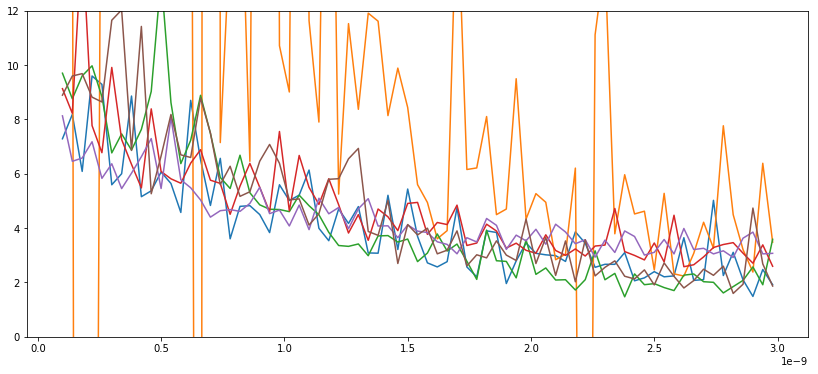

In [66]:
fig, ax = plt.subplots()
for ii, tdtr in enumerate(tdtr_list):
    ax.plot(tdtr.tdelay_vect, tdtr.dT_ratio_exp, label = dict(f_list[ii]['app/settings'].attrs)['sample'] + ' ' + str(np.around(tdtr.f0/1e6,1)))
# ax.legend()
ax.set_ylim(0,12)
fig.set_size_inches(14,6)

In [67]:
test = tdtr_list[-4]
print(test.layer)
print(test.W0)
print(test.f0)
print(test.objective)
# print(test.layer[0]['L'])

# test.W0 = 8e-6
# test.W1 = 7e-6

[{'name': 'Al Transducer', 'kz': 110.0, 'eta': 1.0, 'Cv': 2396000.0, 'L': 7e-08}, {'name': 'Al-Si TBC', 'kz': 0.1, 'eta': 1.0, 'Cv': 1.0, 'L': 1e-09}, {'name': 'Intrinsic Si', 'kz': 142, 'eta': 1.0, 'Cv': 1549000.0, 'L': 0.001}]
5e-06
9999999.999999965
None


In [68]:
print(tdtr.W0)

5e-06



Fit completed!  Fit took 2.0 seconds
 Mean of residuals (normalized by their std; good <0.2< bad): 0.00206
 Durbin-Watson test (bad <1< best <2< ok): 2.33
 Average magnitude of residuals (good <1.5%< bad): 19.24%
	k_sub =	147 W/m-K +/- 11.3 W/m_k (7.69%)
	hbd = 	128 MW/m^2-K +/- 18 MW/m^2-k (14.1%)

Fit completed!  Fit took 30.0 seconds
 Mean of residuals (normalized by their std; good <0.2< bad): 0.091
 Durbin-Watson test (bad <1< best <2< ok): 2.19
 Average magnitude of residuals (good <1.5%< bad): 46.15%
	k_sub =	6.84e+05 W/m-K +/- 3.62e+10 W/m_k (5.29e+06%)
	hbd = 	41.9 MW/m^2-K +/- 1.01e+03 MW/m^2-k (2.41e+03%)

Fit completed!  Fit took 2.4 seconds
 Mean of residuals (normalized by their std; good <0.2< bad): 0.043
 Durbin-Watson test (bad <1< best <2< ok): 1.10
 Average magnitude of residuals (good <1.5%< bad): 16.12%
	k_sub =	127 W/m-K +/- 9.59 W/m_k (7.55%)
	hbd = 	132 MW/m^2-K +/- 20.6 MW/m^2-k (15.5%)

Fit completed!  Fit took 2.8 seconds
 Mean of residuals (normalized by th

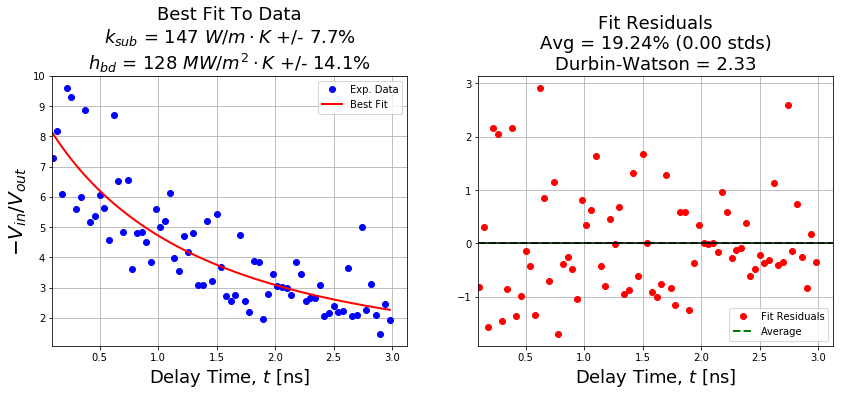

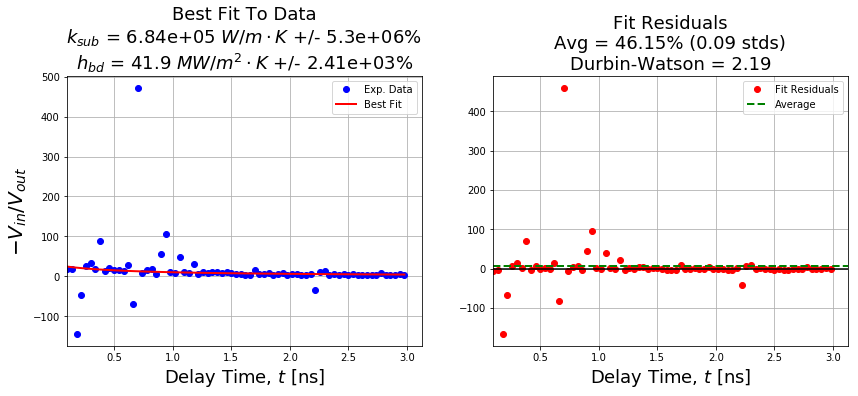

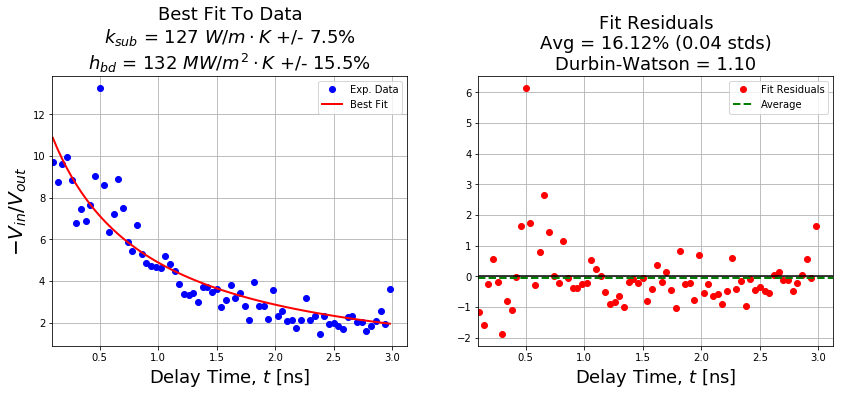

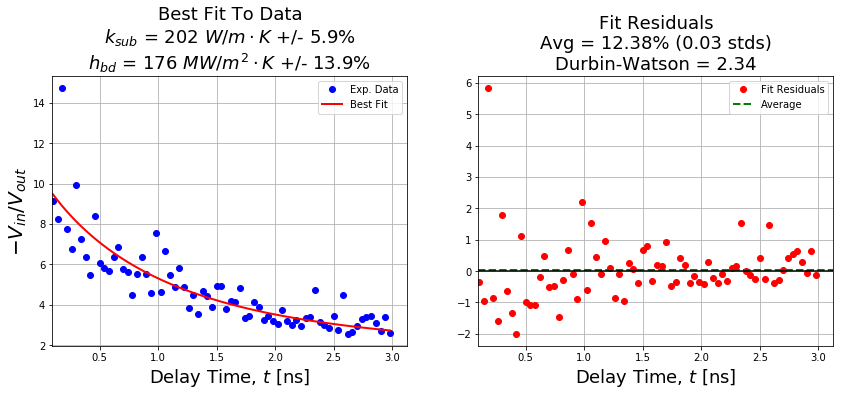

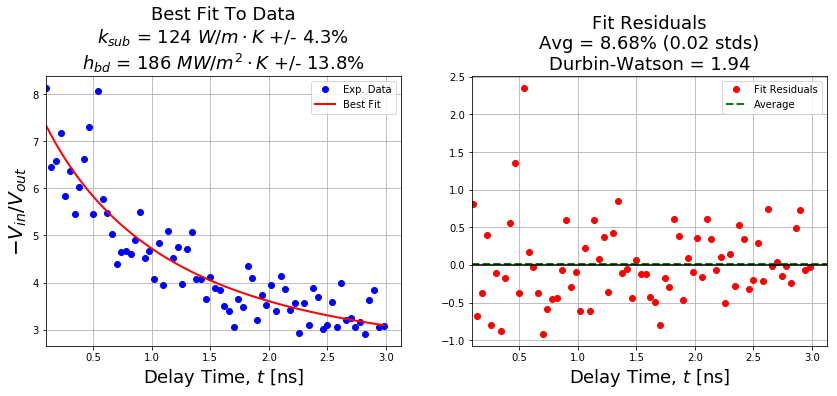

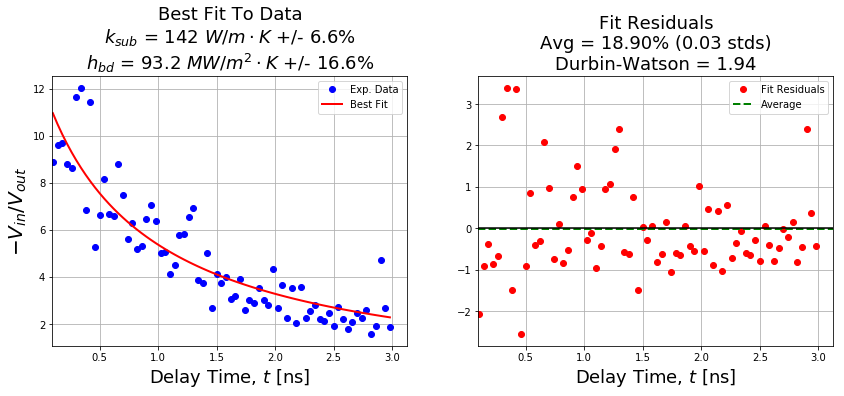

In [69]:
# import numpy as np
fit_list = []
freq_list = []
for tdtr in tdtr_list:#[-1:]:#[14:]:#[1:]:#6]:
#     tdtr.layer[0]['L'] = 8e-8
#     tdtr.layer[0]['kz'] = 50
#     tdtr.layer[1]['kz'] = 0.1
    tdtr.W0 = 8e-6
    tdtr.W1 = 8e-6
#     print("fitting")
    fit, stats = tdtr.fit(return_results = True)
    fit_list.append(fit)
    freq_list.append(tdtr.f0)
#     print(str(np.around(tdtr.f0/1e6,1)))


Fit completed!  Fit took 2.9 seconds
 Mean of residuals (normalized by their std; good <0.2< bad): 0.11
 Durbin-Watson test (bad <1< best <2< ok): 1.30
 Average magnitude of residuals (good <1.5%< bad): 3.78%
	k_sub =	66.4 W/m-K +/- 1.43 W/m_k (2.16%)
	hbd = 	186 MW/m^2-K +/- 8.69 MW/m^2-k (4.68%)

Fit completed!  Fit took 2.5 seconds
 Mean of residuals (normalized by their std; good <0.2< bad): 0.0144
 Durbin-Watson test (bad <1< best <2< ok): 2.26
 Average magnitude of residuals (good <1.5%< bad): 2.75%
	k_sub =	71.7 W/m-K +/- 0.854 W/m_k (1.19%)
	hbd = 	158 MW/m^2-K +/- 4.19 MW/m^2-k (2.65%)

Fit completed!  Fit took 2.5 seconds
 Mean of residuals (normalized by their std; good <0.2< bad): 0.0449
 Durbin-Watson test (bad <1< best <2< ok): 1.72
 Average magnitude of residuals (good <1.5%< bad): 3.04%
	k_sub =	72.3 W/m-K +/- 1.08 W/m_k (1.49%)
	hbd = 	167 MW/m^2-K +/- 5.45 MW/m^2-k (3.27%)

Fit completed!  Fit took 15.8 seconds
 Mean of residuals (normalized by their std; good <0.2< 

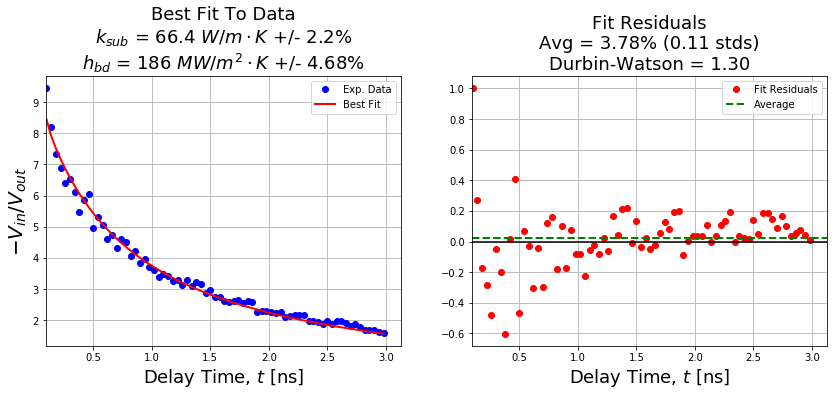

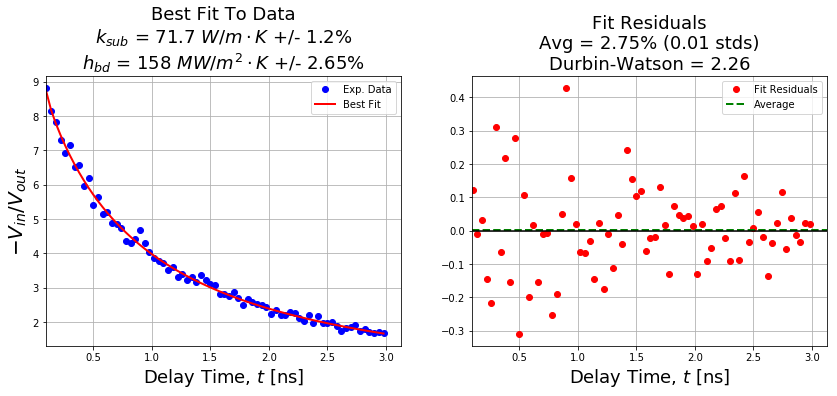

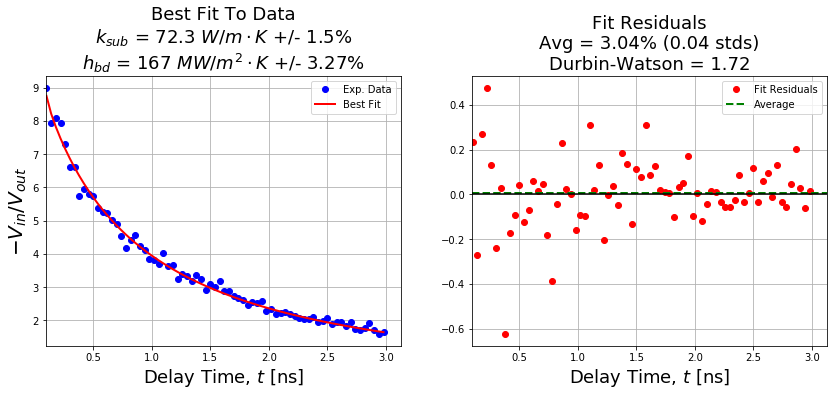

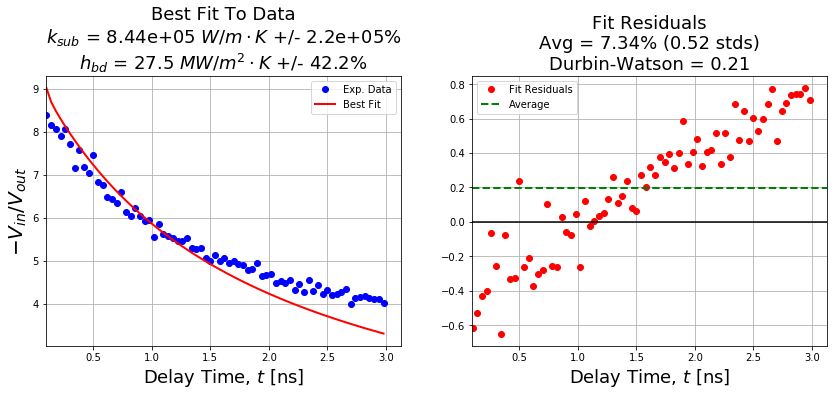

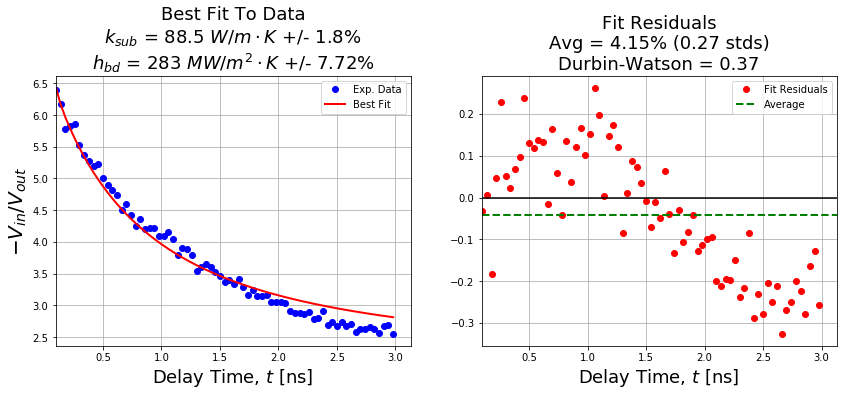

In [296]:
# import numpy as np
fit_list = []
freq_list = []
for tdtr in tdtr_list[6:11]:
    tdtr.layer[0]['L'] = 7e-8
    tdtr.layer[0]['kz'] = 50
    tdtr.layer[1]['kz'] = 0.1
    tdtr.W0 = 7e-6
    tdtr.W1 = 7e-6
    fit, stats = tdtr.fit(return_results = True)
    fit_list.append(fit)
    freq_list.append(tdtr.f0)
#     print(dict(f_list[ii]['app/settings'].attrs)['sample'] + ' ' + str(np.around(tdtr.f0/1e6,1)))


Fit completed!  Fit took 7.1 seconds
 Mean of residuals (normalized by their std; good <0.2< bad): 0.0856
 Durbin-Watson test (bad <1< best <2< ok): 0.70
 Average magnitude of residuals (good <1.5%< bad): 8.14%
	k_sub =	94.8 W/m-K +/- 4.02 W/m_k (4.24%)
	hbd = 	177 MW/m^2-K +/- 31 MW/m^2-k (17.6%)

Fit completed!  Fit took 3.1 seconds
 Mean of residuals (normalized by their std; good <0.2< bad): 0.0519
 Durbin-Watson test (bad <1< best <2< ok): 1.12
 Average magnitude of residuals (good <1.5%< bad): 7.62%
	k_sub =	96.5 W/m-K +/- 3.84 W/m_k (3.98%)
	hbd = 	203 MW/m^2-K +/- 34.5 MW/m^2-k (17%)

Fit completed!  Fit took 2.0 seconds
 Mean of residuals (normalized by their std; good <0.2< bad): 0.0131
 Durbin-Watson test (bad <1< best <2< ok): 1.32
 Average magnitude of residuals (good <1.5%< bad): 3.82%
	k_sub =	91.3 W/m-K +/- 1.51 W/m_k (1.66%)
	hbd = 	107 MW/m^2-K +/- 5.74 MW/m^2-k (5.36%)

Fit completed!  Fit took 1.6 seconds
 Mean of residuals (normalized by their std; good <0.2< bad)

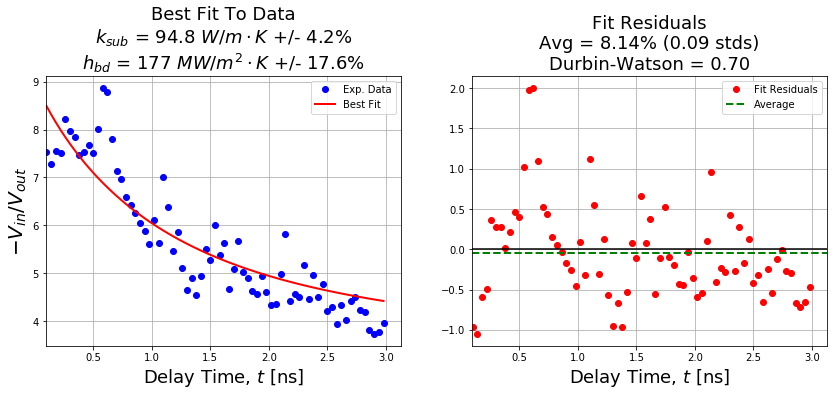

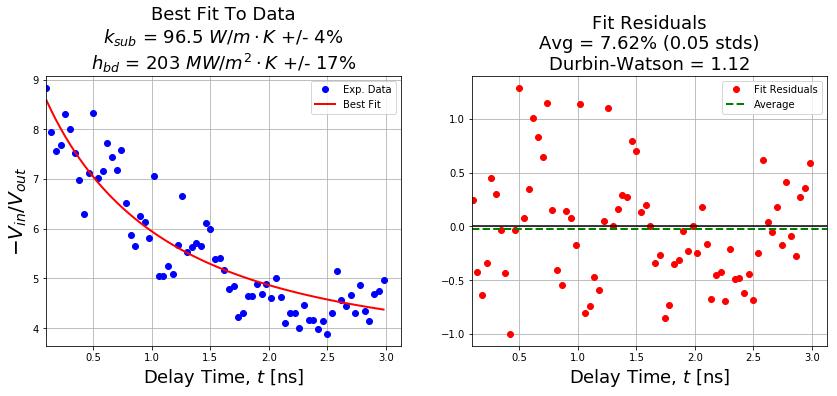

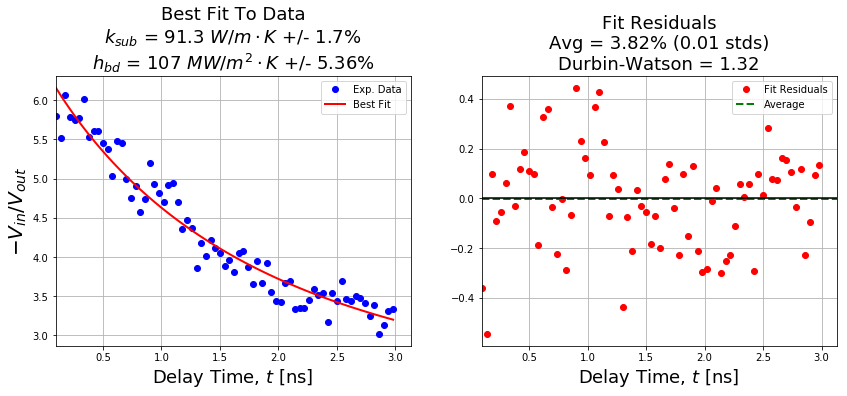

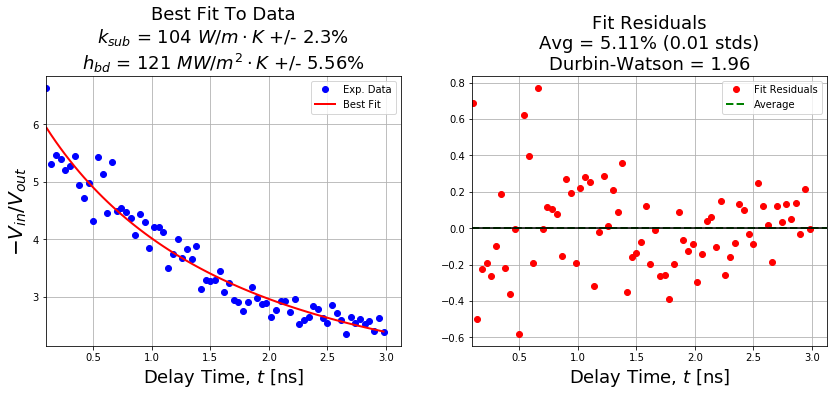

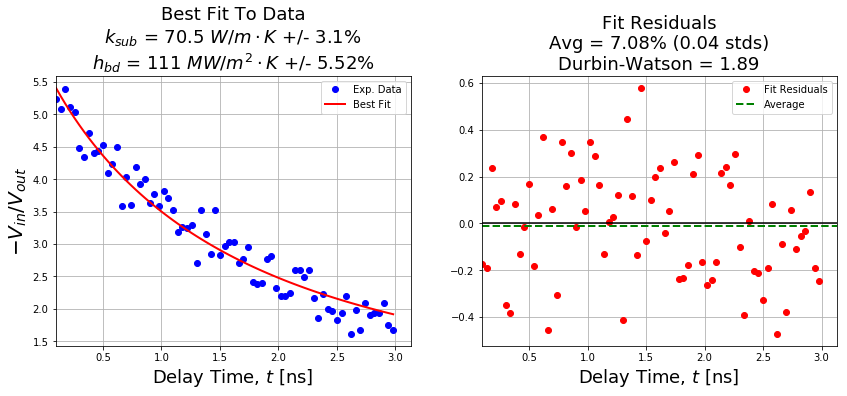

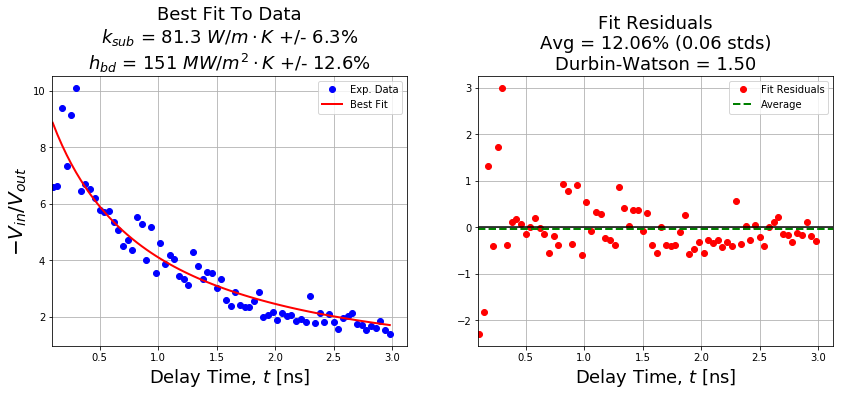

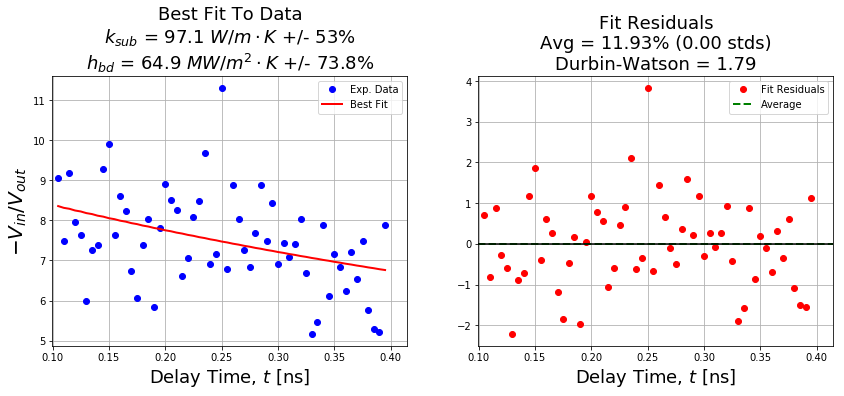

In [45]:
# import numpy as np
fit_list = []
freq_list = []
for tdtr in tdtr_list[11:]:
#     tdtr.layer[0]['L'] = 7e-8
#     tdtr.layer[0]['kz'] = 50
#     tdtr.layer[1]['kz'] = 0.1
    tdtr.W0 = 7.5e-6
    tdtr.W1 = 7.5e-6
    fit, stats = tdtr.fit(return_results = True)
    fit_list.append(fit)
    freq_list.append(tdtr.f0)

In [ ]:
fit_list = np.array(fit_list)
# print(fit_list[:,0])
plt.semilogx(freq_list, fit_list[:,0], 'o')


Fit completed!  Fit took 2.1 seconds
 Mean of residuals (normalized by their std; good <0.2< bad): 0.00692
 Durbin-Watson test (bad <1< best <2< ok): 2.15
 Average magnitude of residuals (good <1.5%< bad): 2.72%
	k_sub =	79.2 W/m-K +/- 0.961 W/m_k (1.21%)
	hbd = 	102 MW/m^2-K +/- 2.83 MW/m^2-k (2.78%)


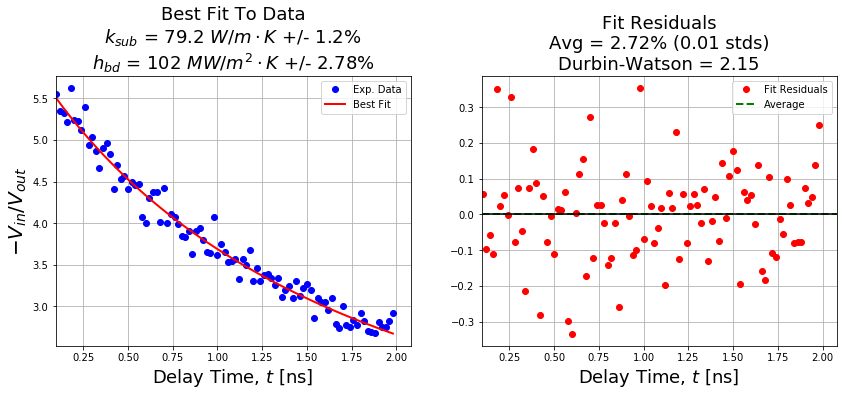

In [291]:
test2 = TDTR()
dT_ratio_exp = -M_corr[-1]['x']/M_corr[-1]['y']
tdelay_vect = M_corr[-1]['t']

selection_a = tdelay_vect >= 100e-12 # Create mask for delay times >100 ps
selection_b = tdelay_vect <= 4e-9
selection = np.array([all(tup) for tup in zip(selection_a, selection_b)])


test2.dT_ratio_exp = dT_ratio_exp[selection]
test2.tdelay_vect = tdelay_vect[selection]


test2.W0 = 8e-6
test2.W1 = 7e-6

test2.fit()

In [114]:
m3_lockin_attrs = dict(f3['hardware/TDTR_Lockin/settings'].attrs)
m4_lockin_attrs = dict(f4['hardware/TDTR_Lockin/settings'].attrs)
print(m3_lockin_attrs['x_offset'],m3_lockin_attrs['y_offset'])
print(m4_lockin_attrs['x_offset'],m4_lockin_attrs['y_offset'])

1.7033682129870076e-08 -9.867658192770575e-08
-4.7196938924469946e-08 1.6193785328935813e-07


In [132]:
(270+180) %360. - 180

-90.0

In [55]:
from datetime import datetime
t0 = time.time()
test_format = "{timestamp:%y%m%d_%H%M%S}_{measurement}"
print(test_format.format(           
            measurement='thorcam',
            timestamp=datetime.fromtimestamp(t0)))
#         fname = os.path.join(app.settings['save_dir'], f)

190712_145802_thorcam


In [56]:
"{timestamp:%y%m%d_%H%M%S}_{measurement}"% (datetime.fromtimestamp(t0), 'thorcam')

ValueError: unsupported format character 'y' (0x79) at index 12

In [71]:
np.geomspace(100, 3000, num=6)

array([ 100.        ,  197.43504858,  389.80598409,  769.61363407,
       1519.48705234, 3000.        ])